In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [52]:
# Parameter dari data
N = 279798049  # Total populasi
alpha = 0.0000455  # Tingkat kelahiran harian
mu = 0.0000187 #6.7e-5  # Tingkat kematian alami (dalam desimal = 0.0000187)
beta1 = 0.4  # Estimasi tingkat infeksi untuk S
beta2 = 0.1  # Estimasi tingkat infeksi untuk V
beta3 = 0.5  # Estimasi tingkat infeksi untuk Vm
gamma1 = 0.653  # Efektivitas vaksin
gamma2 = 0.01  # Pertumbuhan populasi misinformed
gamma3 = 0.0714  # Tingkat pemulihan
gamma = 0.00476  # Kehilangan kekebalan (6-8 bulan)


In [53]:
# Populasi awal
I0 = 520000  # Kasus aktif awal
R0 = 508000  # Kasus sembuh awal
V0 = 161861222  # Populasi divaksin
Vm0 = 0.27 * N  # Populasi misinformed
S0 = N - I0 - R0 - V0 - Vm0  # Sisanya adalah populasi rentan

In [54]:
# Waktu simulasi (dalam hari)
t_start = 0
t_end = 365 * 1 # (x 4) untuk simulasi 4 tahun (januari 2021 - januari 2025)

In [55]:
def svir_model(t, y):
    S, V, Vm, I, R = y
    dSdt = alpha * N - mu * S - beta1 * S * I / N - gamma1 * S
    dVdt = gamma1 * S - beta2 * V * I / N - gamma * V
    dVmdt = gamma2 * S - beta3 * Vm * I / N
    dIdt = beta1 * S * I / N + beta2 * V * I / N + beta3 * Vm * I / N - gamma3 * I - mu * I
    dRdt = gamma3 * I - gamma * R - mu * R
    return [dSdt, dVdt, dVmdt, dIdt, dRdt]


In [56]:
# Kondisi awal
y0 = [S0, V0, Vm0, I0, R0]

# Penyelesaian persamaan diferensial
solution = solve_ivp(svir_model, [t_start, t_end], y0, t_eval=np.linspace(t_start, t_end, 365))

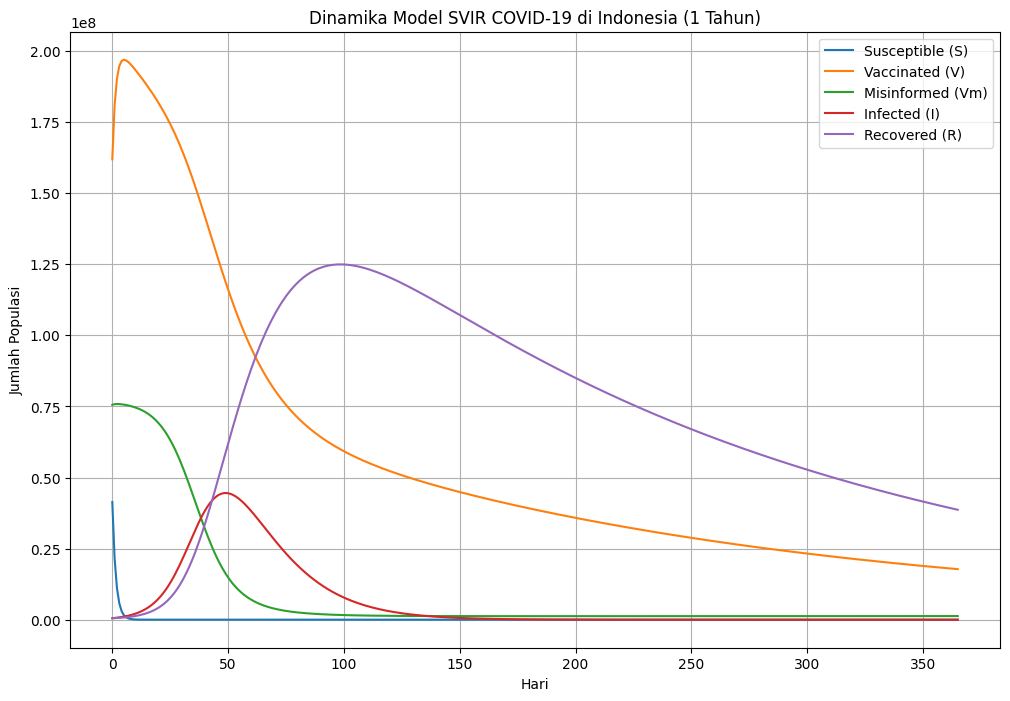

In [57]:
# Plot hasil
plt.figure(figsize=(12, 8))
plt.plot(solution.t, solution.y[0], label='Susceptible (S)')
plt.plot(solution.t, solution.y[1], label='Vaccinated (V)')
plt.plot(solution.t, solution.y[2], label='Misinformed (Vm)')
plt.plot(solution.t, solution.y[3], label='Infected (I)')
plt.plot(solution.t, solution.y[4], label='Recovered (R)')

plt.title('Dinamika Model SVIR COVID-19 di Indonesia (1 Tahun)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Populasi')
plt.legend()
plt.grid()
plt.show()